In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
def load_data(filename, FOLDER="./data"):
    csv_path = os.path.join(FOLDER, filename)
    return pd.read_csv(csv_path,sep='\t')

In [3]:
data = load_data("marketing_campaign.csv")
display(data.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Dataset Description

First lest's have a brief introduction to all attributes in the dataset we use:

##### People

ID: Customer's unique identifier \
Year_Birth: Customer's birth year  
Education: Customer's education level \
Marital_Status: Customer's marital status \
Income: Customer's yearly household income \
Kidhome: Number of children in customer's household \
Teenhome: Number of teenagers in customer's household \
Dt_Customer: Date of customer's enrollment with the company \
Recency: Number of days since customer's last purchase \
Complain: 1 if customer complained in the last 2 years, 0 otherwise 

##### Products

MntWines: Amount spent on wine in last 2 years \
MntFruits: Amount spent on fruits in last 2 years \
MntMeatProducts: Amount spent on meat in last 2 years \
MntFishProducts: Amount spent on fish in last 2 years \
MntSweetProducts: Amount spent on sweets in last 2 years \
MntGoldProds: Amount spent on gold in last 2 years 

##### Promotion

NumDealsPurchases: Number of purchases made with a discount   \
AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise \
AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise \
AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise \
AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise \
AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise \
Response: 1 if customer accepted the offer in the last campaign, 0 otherwise 

##### Place

NumWebPurchases: Number of purchases made through the company’s web site \
NumCatalogPurchases: Number of purchases made using a catalogue \
NumStorePurchases: Number of purchases made directly in stores \
NumWebVisitsMonth: Number of visits to company’s web site in the last month 

## Data Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

There are 3 'object type' variables - ['Education', 'Marital_Status', 'Dt_Customer'], and the rest are all numerical. So we will need to convert these variables to numeric values

In [5]:
data.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

There are 24 NA rows in 'Income' columns, so we fill these NA with the average income of all people

In [6]:
data['Income'].fillna(np.mean(data['Income']), inplace=True)

In [7]:
pd.DataFrame(data.nunique()).sort_values(0).rename( {0: 'Unique Values'}, axis=1)

,Unique Values
Z_Revenue,1
Z_CostContact,1
Response,2
AcceptedCmp3,2
AcceptedCmp4,2
AcceptedCmp2,2
Complain,2
AcceptedCmp1,2
AcceptedCmp5,2
Kidhome,3


Z_Revenue & Z_CostContact have Constant value, which don't provide any information, so we should drop them. ID also doesn't provide any additional information, so we will drop it as well.

Response - AcceptedCmp5 are all Binary Variables.  

Marital_Status & Education can be seen as Categorical Variable.

Kidhome & Teenhome are Discrete Ordinal Variables, for which have clear orders but not many different values.

The rest 16 variables can be seen as Continuous Ordinal Variables.

In [8]:
data.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True) 
data.drop(['ID'], axis=1, inplace=True) 

In [9]:
data['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Alone, Adsurd and YOLO are all specific situations of 'Single', so replace all of them with 'Single'

In [10]:
data['Marital_Status'] = data['Marital_Status'].replace(['Alone','YOLO','Absurd'], 'Single')

In [11]:
data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Education values will remain the same. 

Let's change Dt_Customer values to the number of years particular customer cooperates with the shop.

In [12]:
import datetime

current_year = datetime.date.today().year

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data['Customming_years'] = 2015 - data['Dt_Customer'].dt.year

data.drop(['Dt_Customer'], axis=1, inplace=True) 

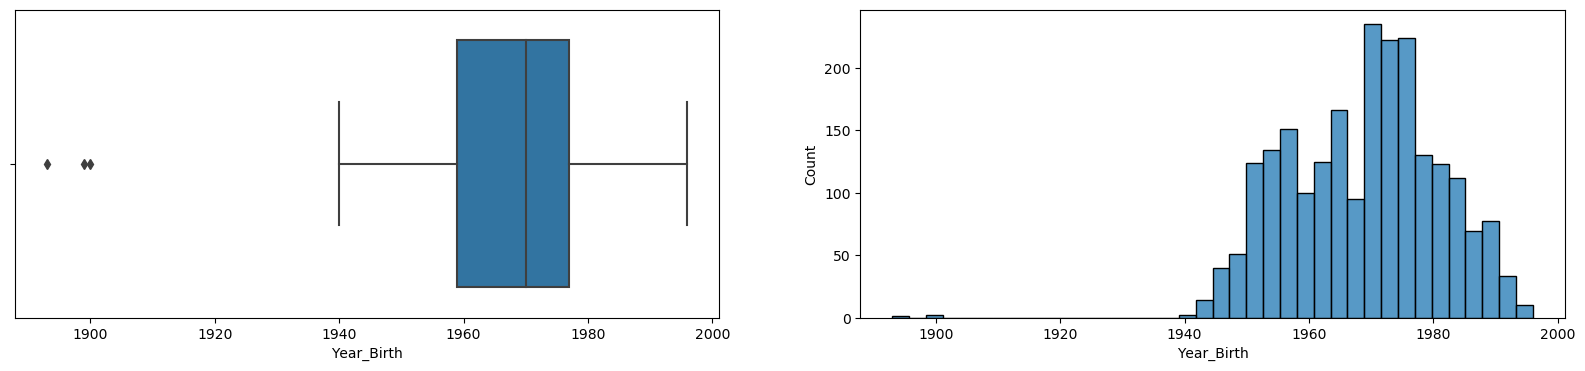

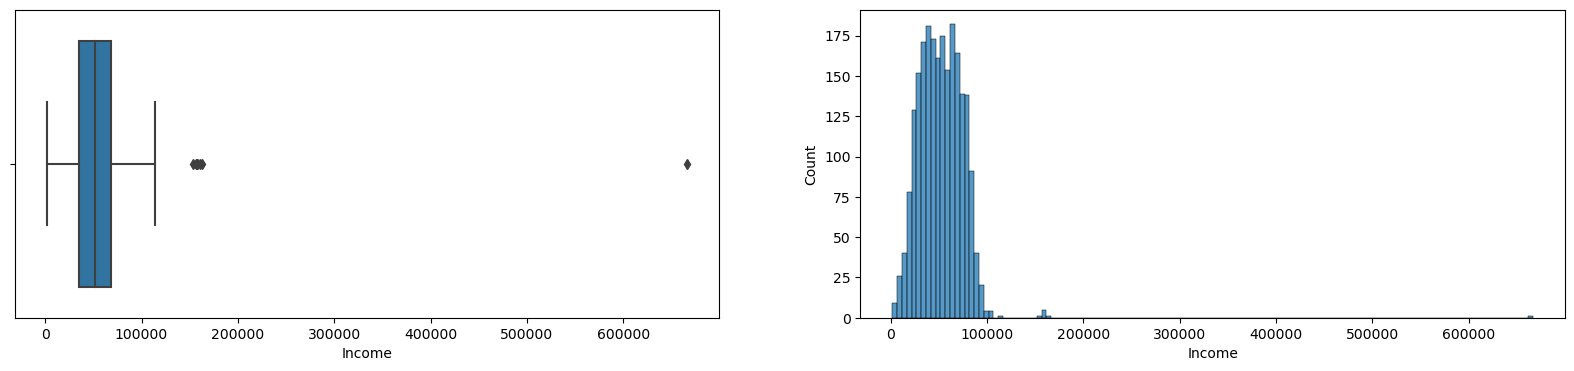

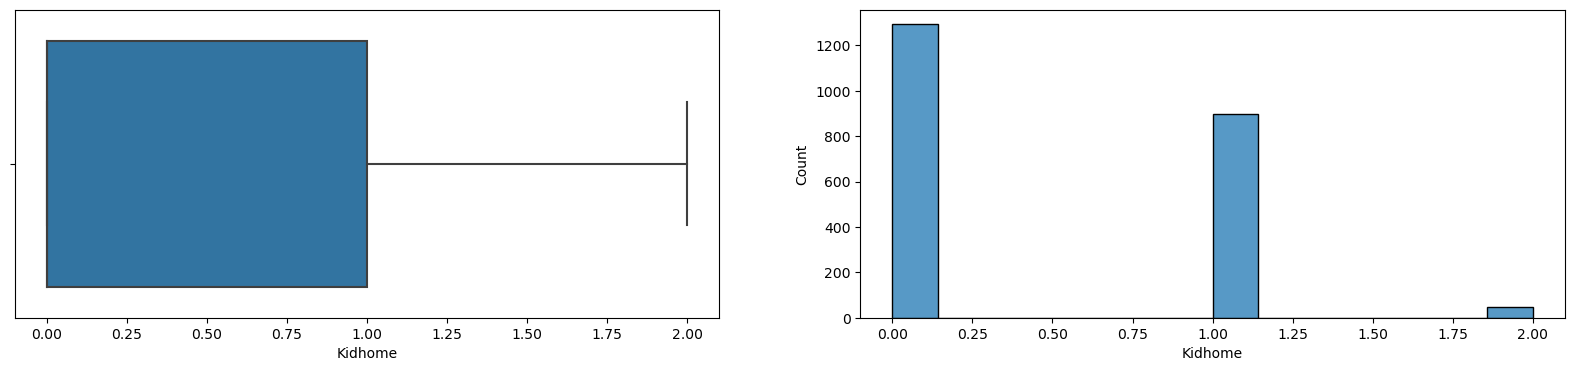

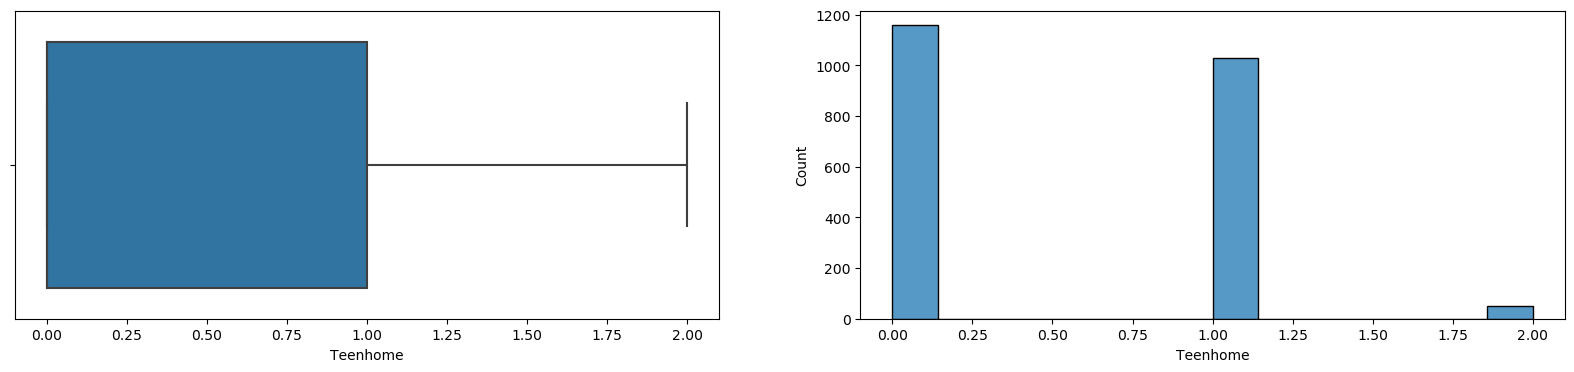

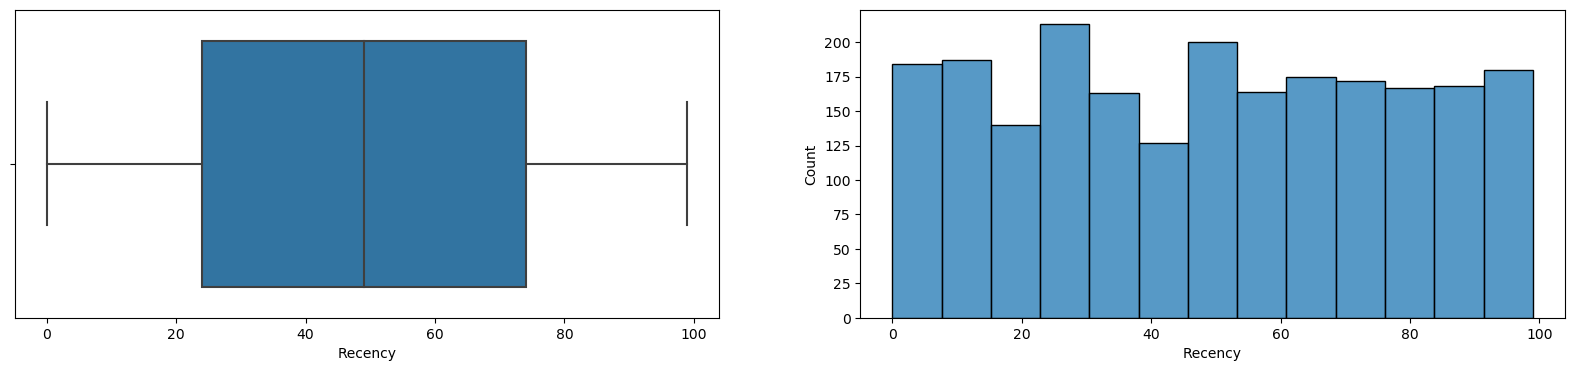

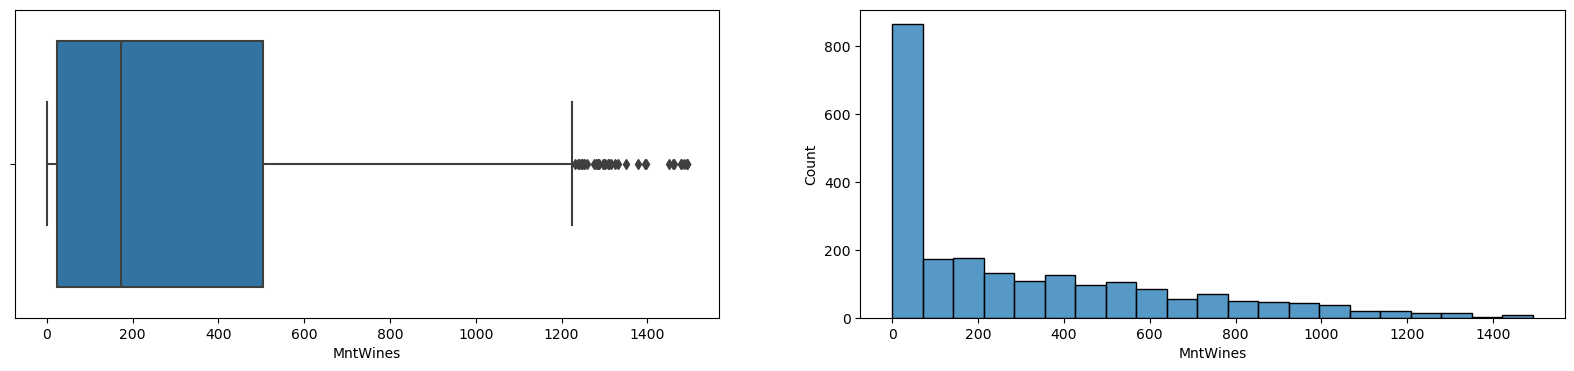

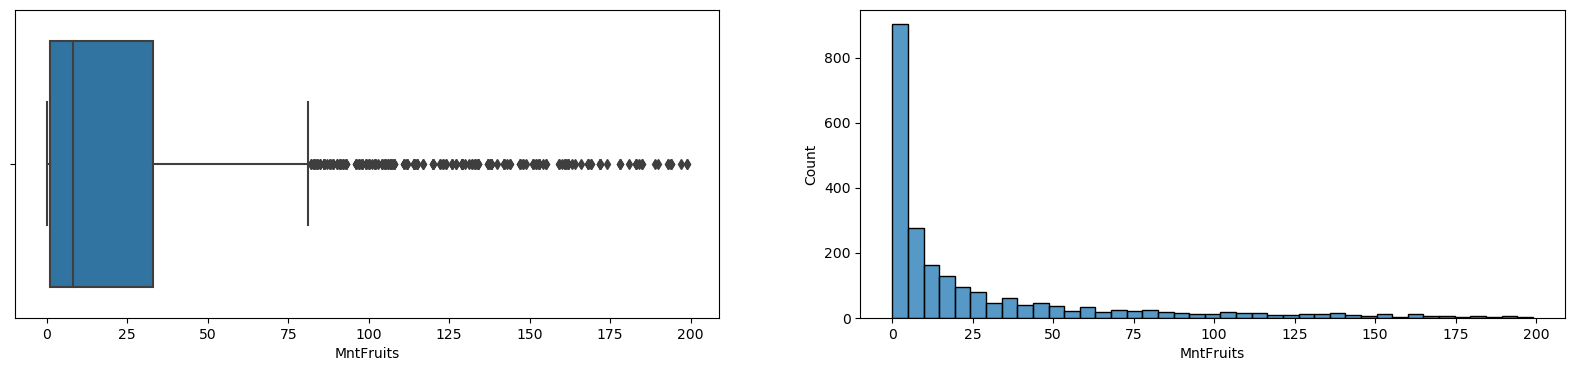

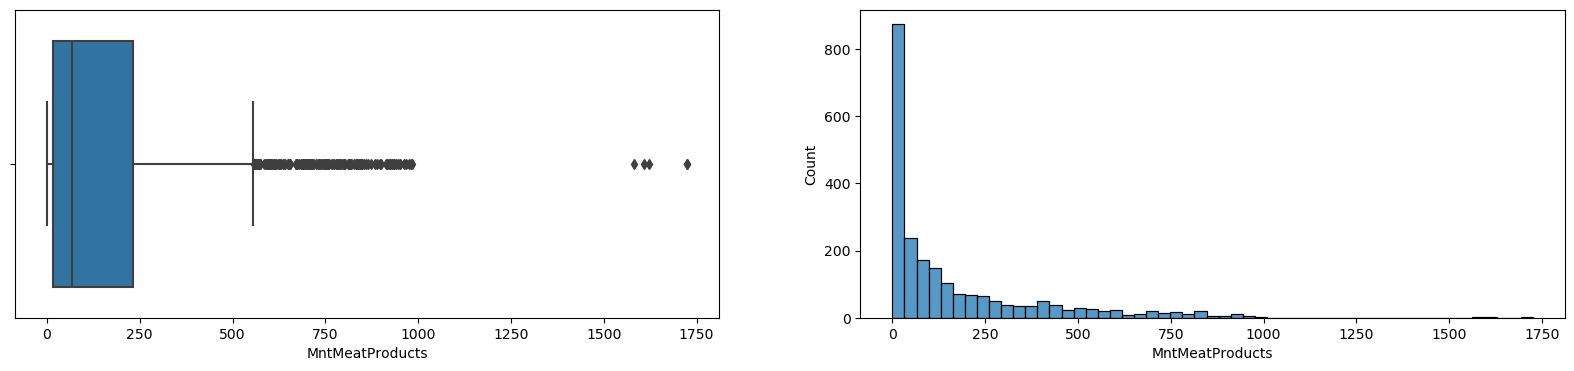

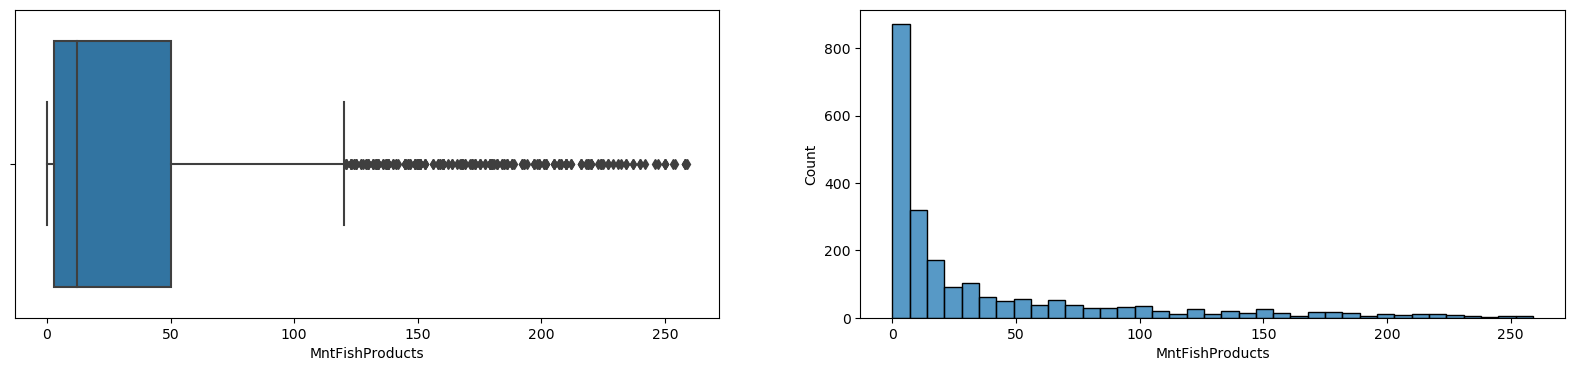

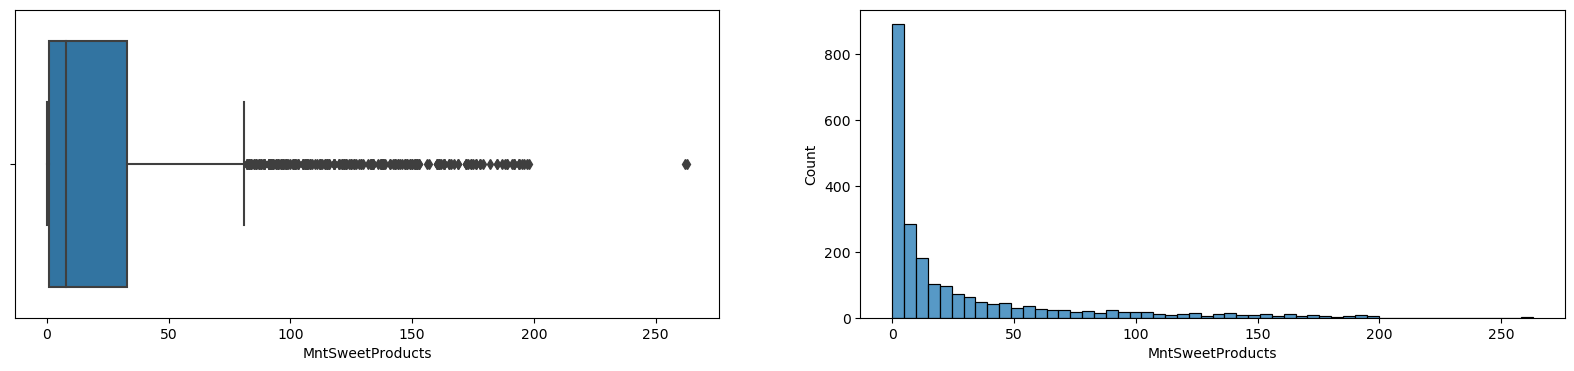

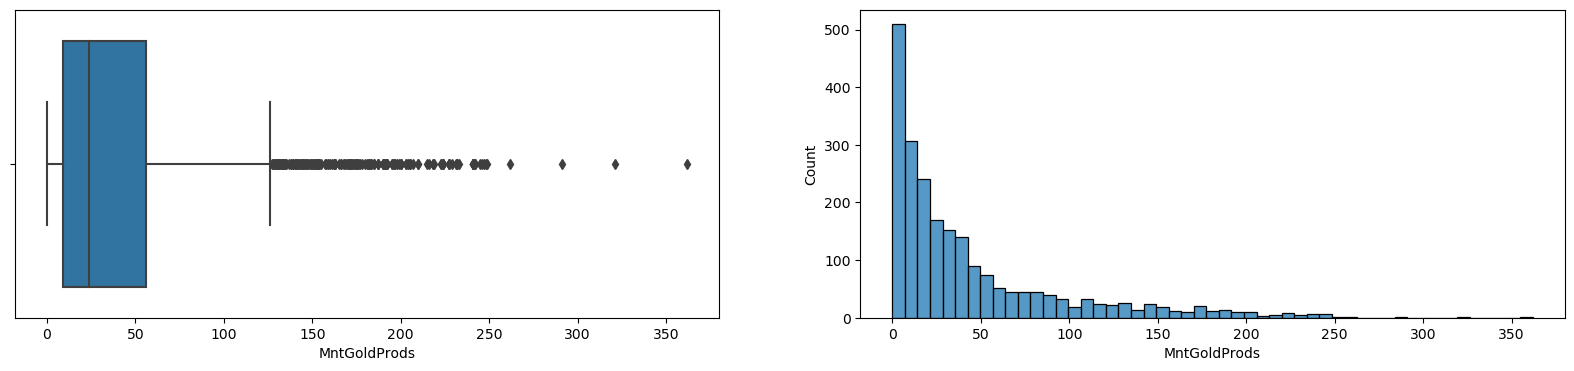

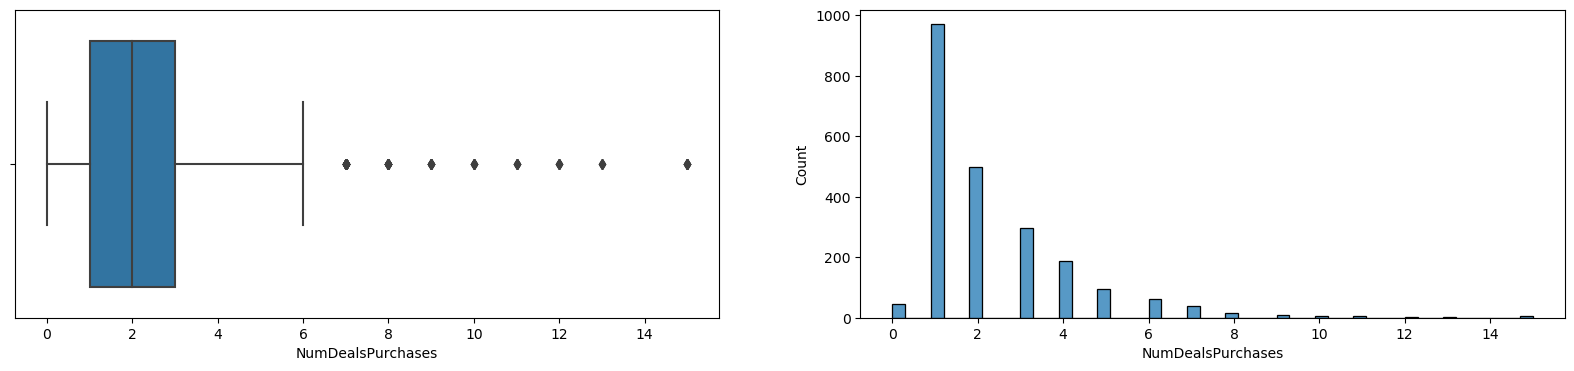

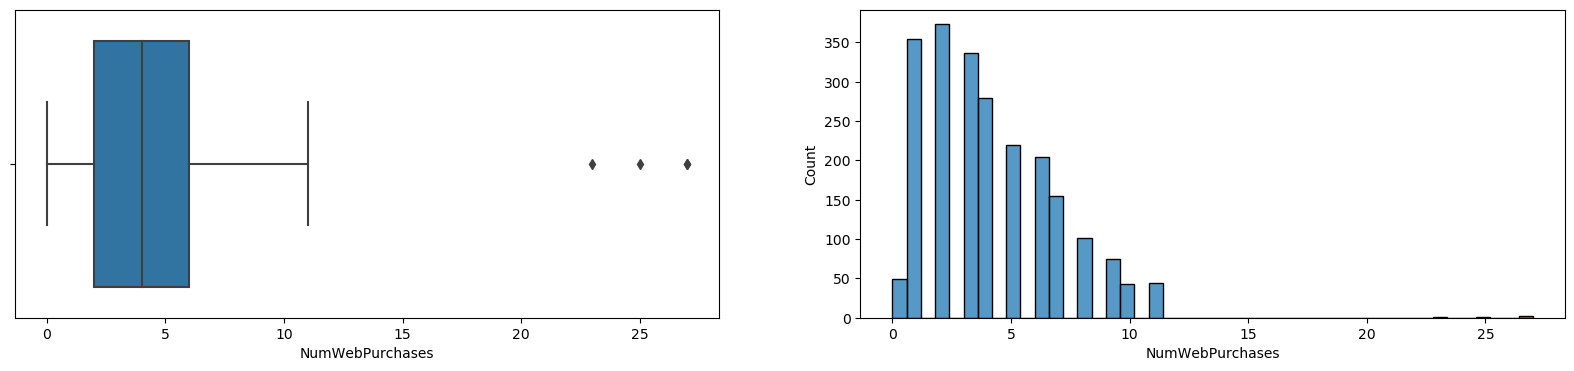

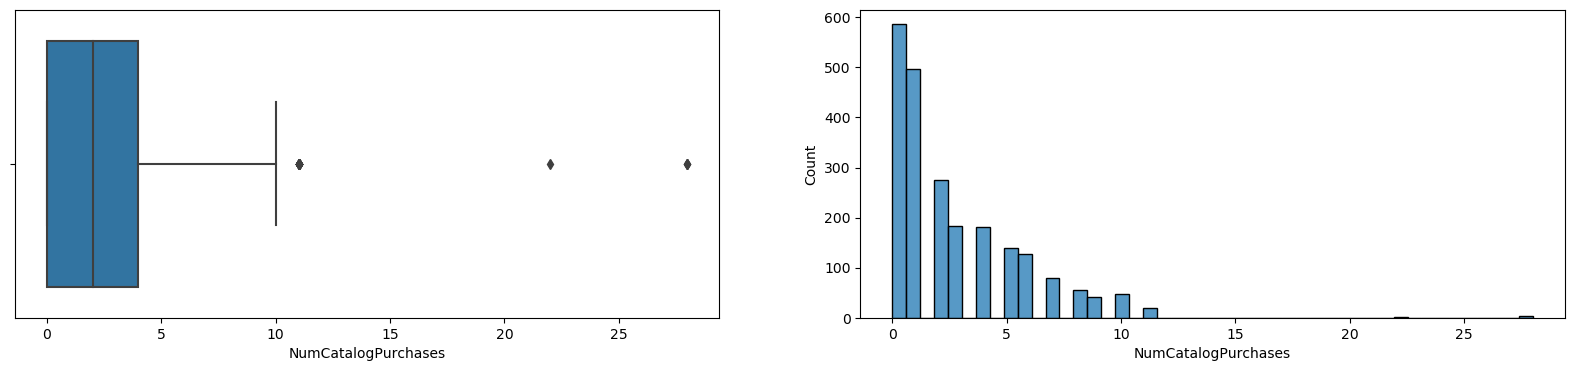

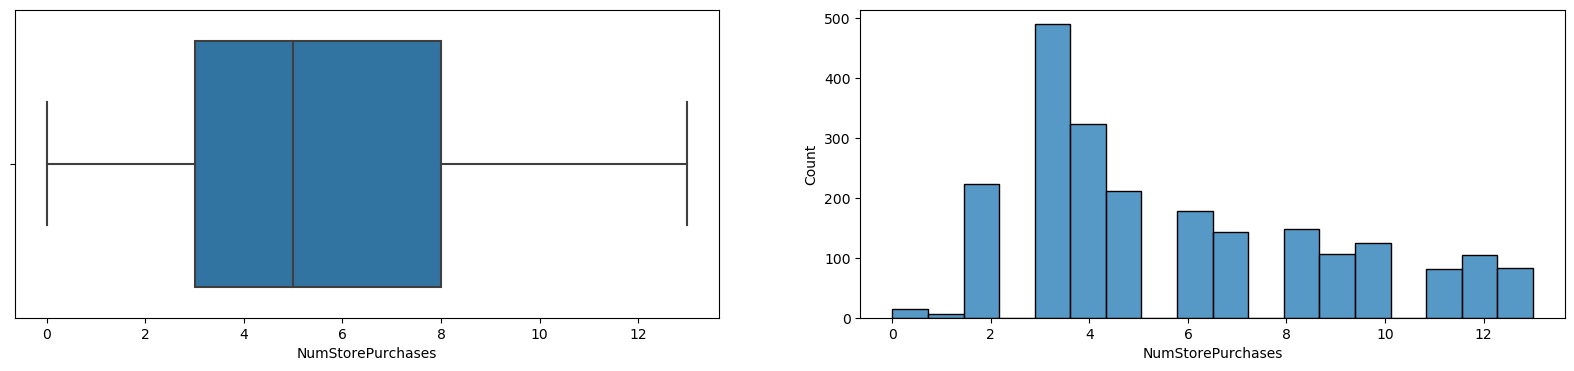

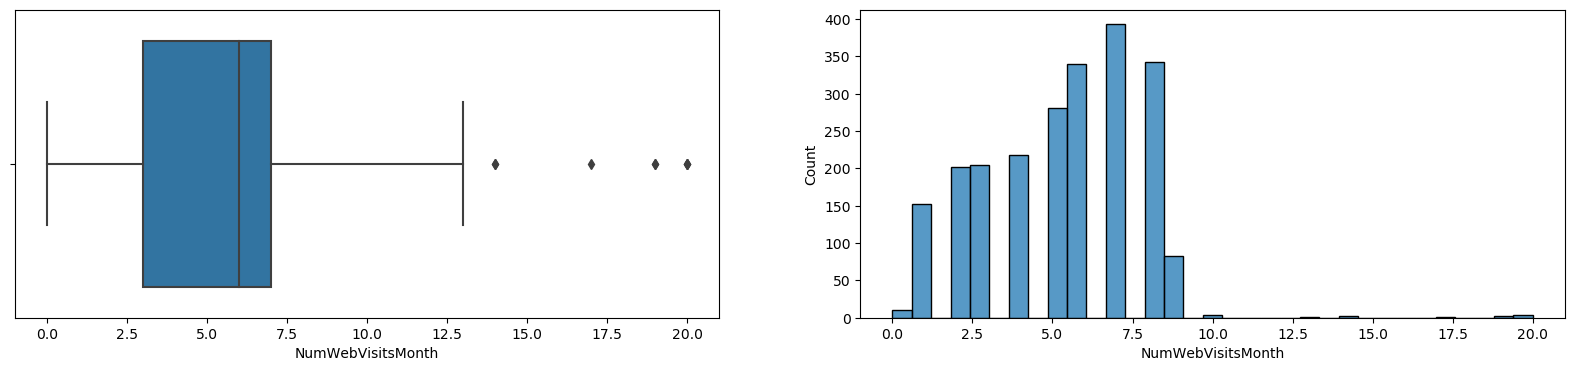

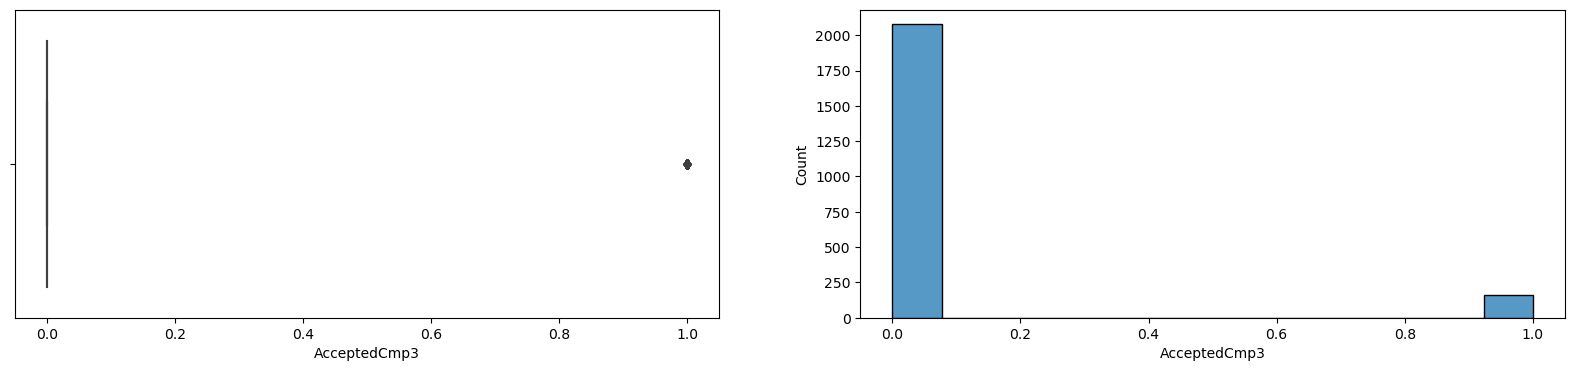

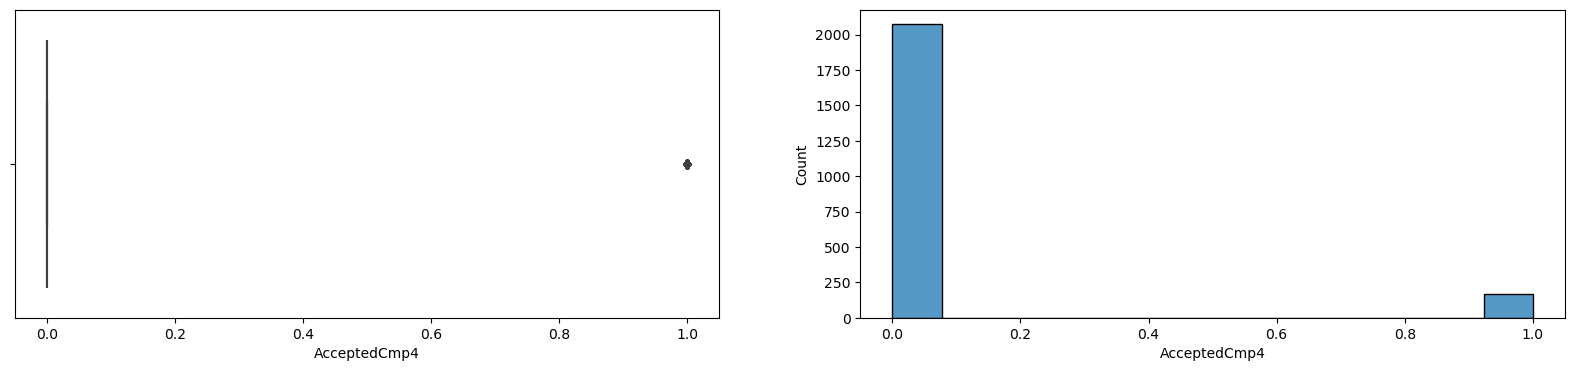

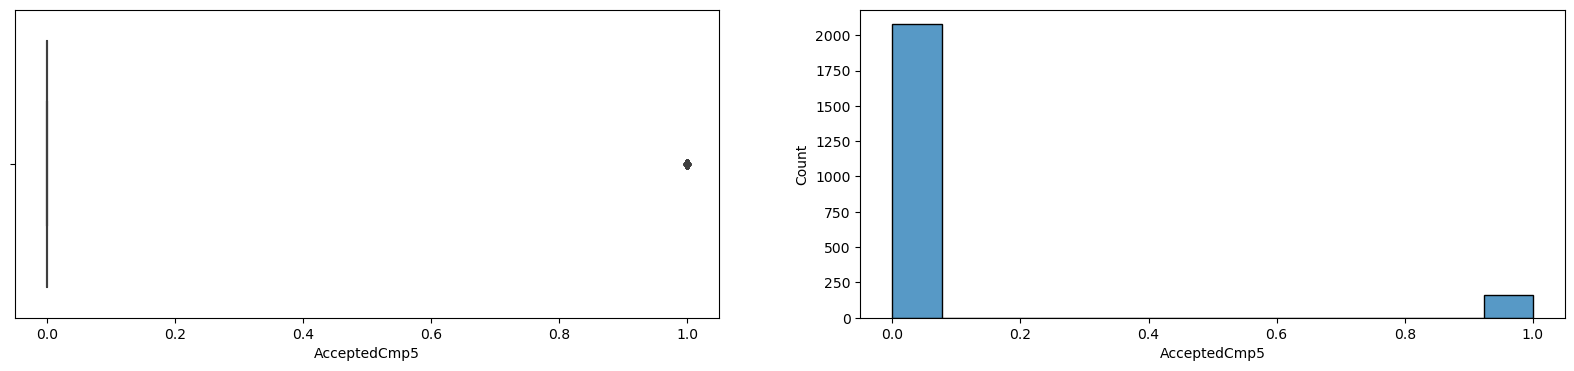

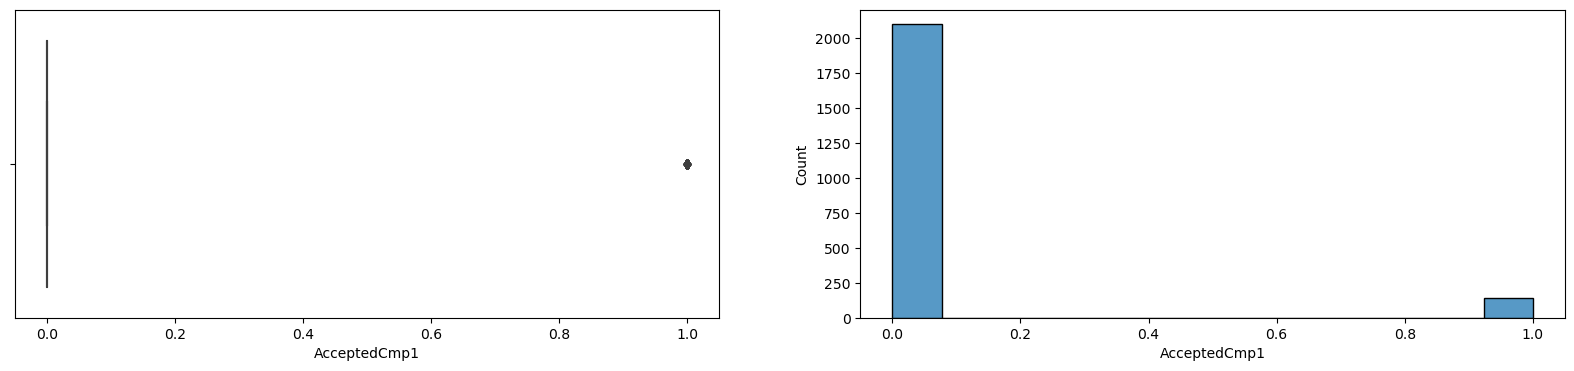

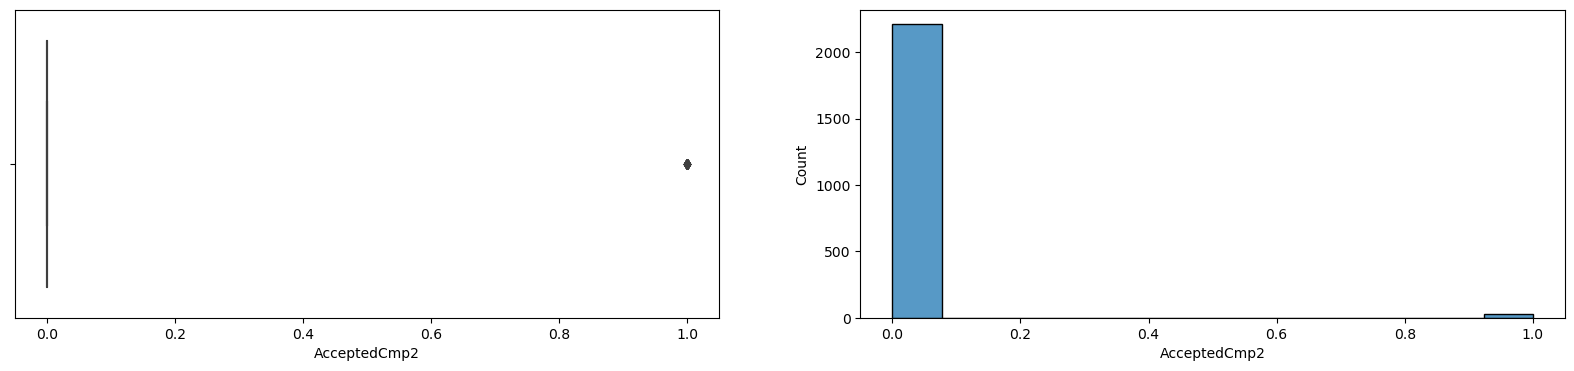

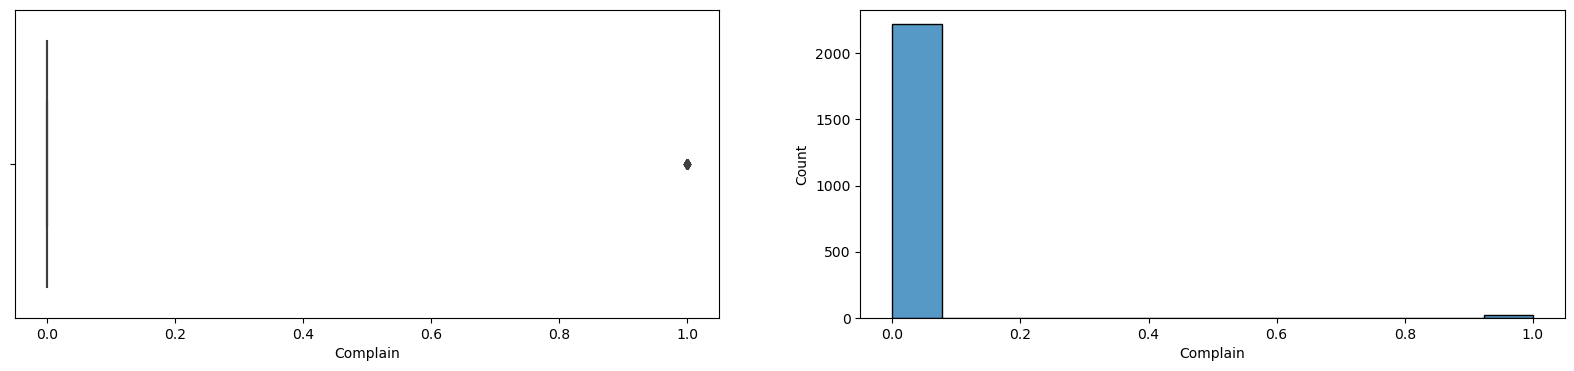

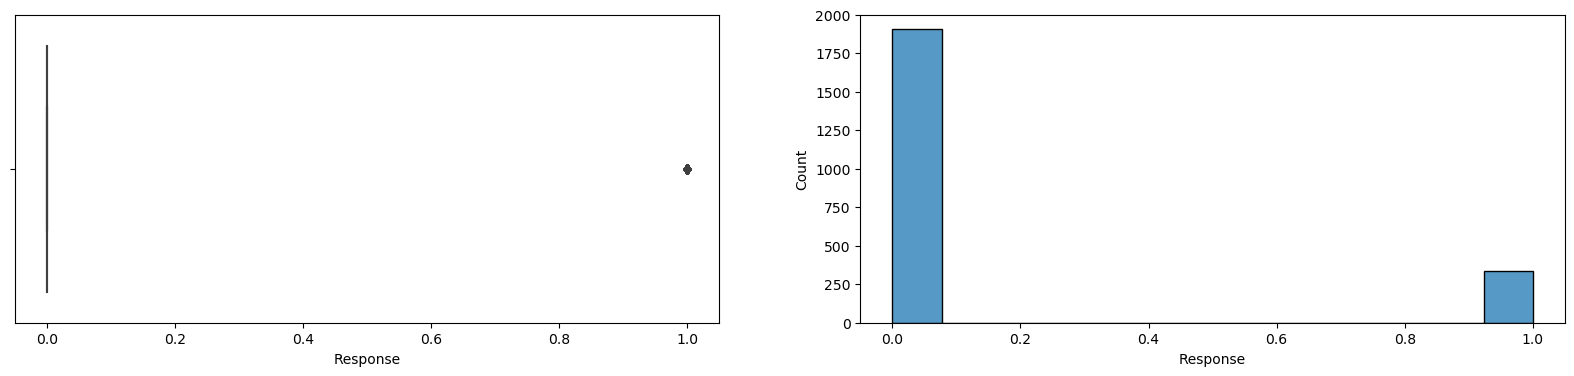

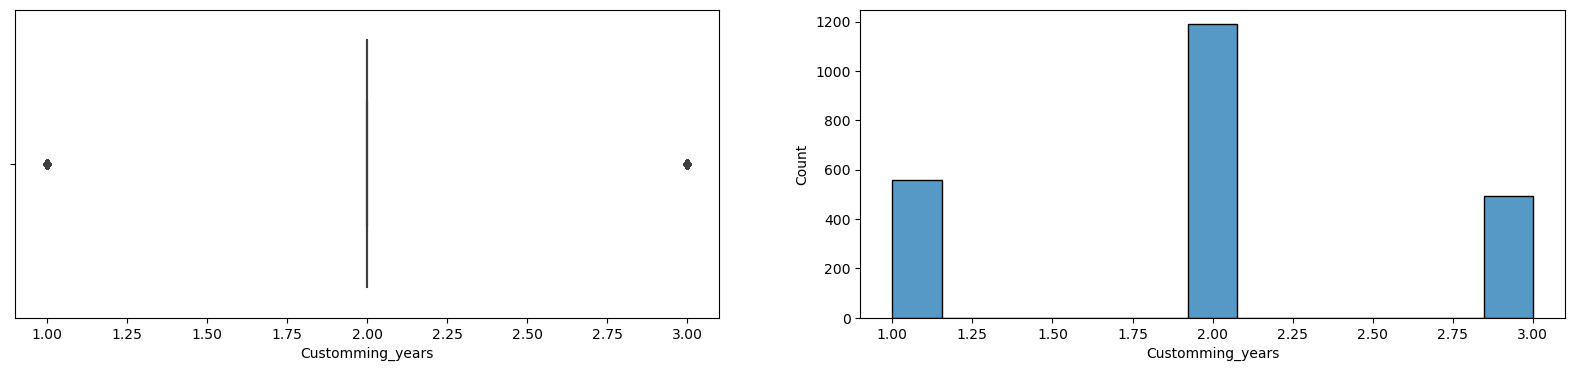

In [13]:
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()

for column_name in numerical_columns:
    plt.figure(figsize=(20,4))
    plt.subplot(1,2,1)
    sns.boxplot(x=data[column_name],data=data)
    plt.subplot(1,2,2)
    sns.histplot(x=data[column_name],data=data)
    plt.show()

We can see some clear outliers in Income and Year of birth. Let's will remove the rows where the Income is greater than 200K and birth year is less than 1920.

In [14]:
data.drop(data[(data['Income']>200000)|(data['Year_Birth']<1920)].index, inplace=True)

Zmienienimy kolumne Year_Birth na kolumne Age

In [15]:
current_year = datetime.date.today().year

data['Age'] = current_year - data.Year_Birth.to_numpy()
data.drop('Year_Birth', axis=1, inplace=True)

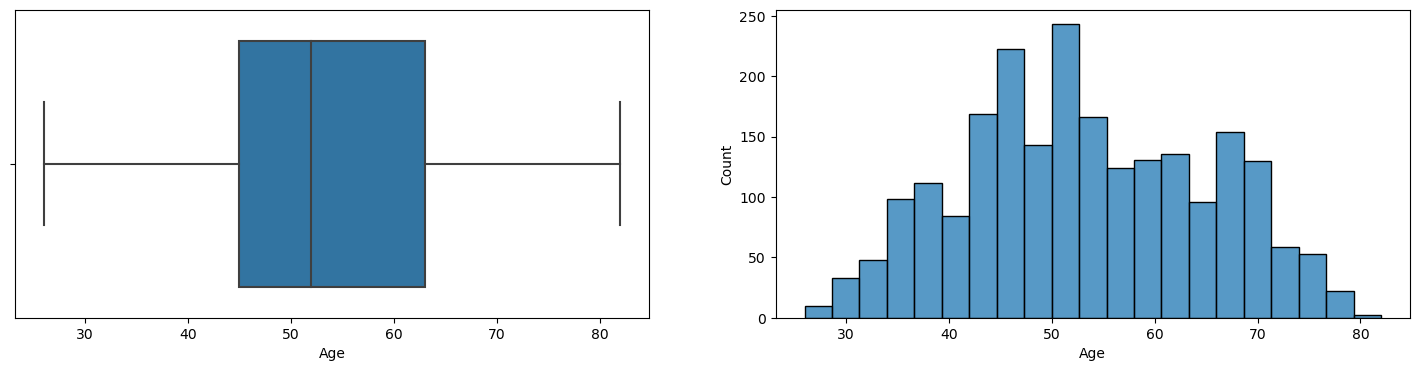

In [16]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(x=data['Age'],data=data)
plt.subplot(1,2,2)
sns.histplot(x=data['Age'],data=data)
plt.show()

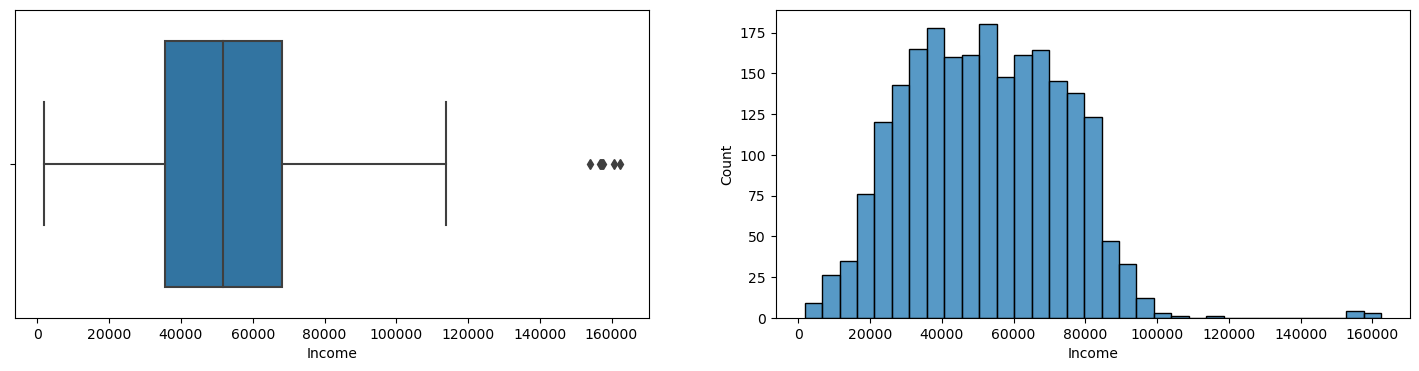

In [17]:
plt.figure(figsize=(18,4))
plt.subplot(1,2,1)
sns.boxplot(x=data['Income'],data=data)
plt.subplot(1,2,2)
sns.histplot(x=data['Income'],data=data)
plt.show()

## Exploretory Data Analysis

Podzielimy zbior danych na wartosci kategoryczne i numeryczne

In [18]:
data.describe(include='object')

,Education,Marital_Status
count,2236,2236
unique,5,5
top,Graduation,Married
freq,1126,864


In [19]:
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()
categorical_cilumns = ['Education', 'Marital_Status']

#### Categorical data

Graduation    1126
PhD            485
Master         370
2n Cycle       201
Basic           54
Name: Education, dtype: int64


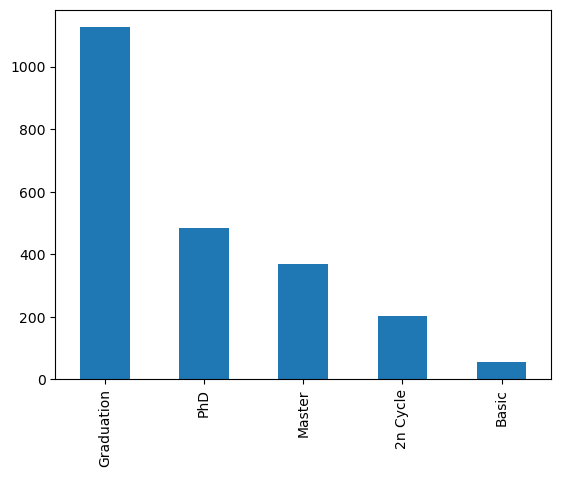

In [20]:
print(data.Education.value_counts())
data.Education.value_counts().plot(kind="bar")

Married     864
Together    578
Single      486
Divorced    231
Widow        77
Name: Marital_Status, dtype: int64


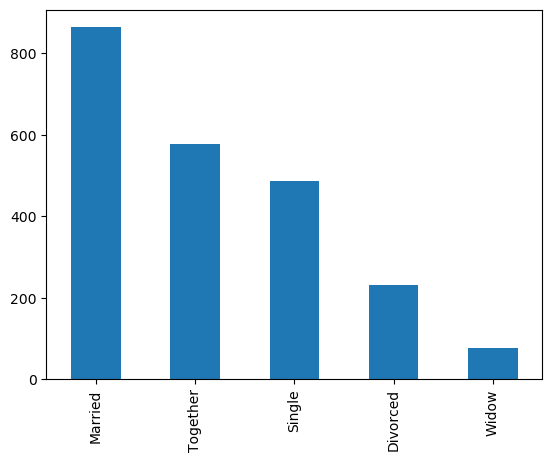

In [23]:
print(data.Marital_Status.value_counts())
data.Marital_Status.value_counts().plot(kind="bar")

Let's check dependencies between categorical data and responce column

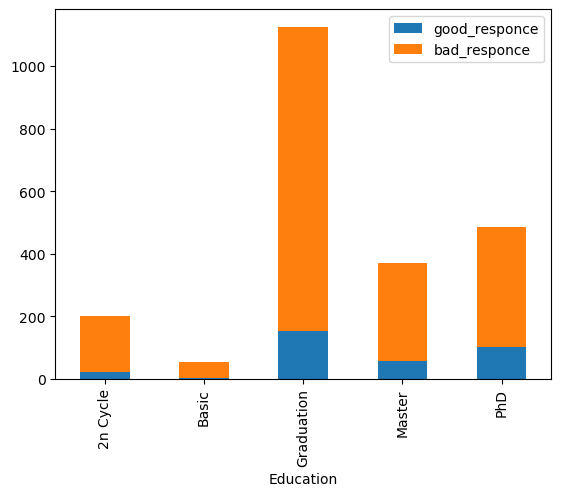

In [24]:
tmp_data = data.copy()
tmp_data['good_responce'] = tmp_data['Response']
tmp_data['bad_responce'] = 1 - tmp_data['Response']
tmp_data.groupby('Education').agg('sum')[['good_responce', 'bad_responce']].plot(kind='bar',
                                                          stacked=True);

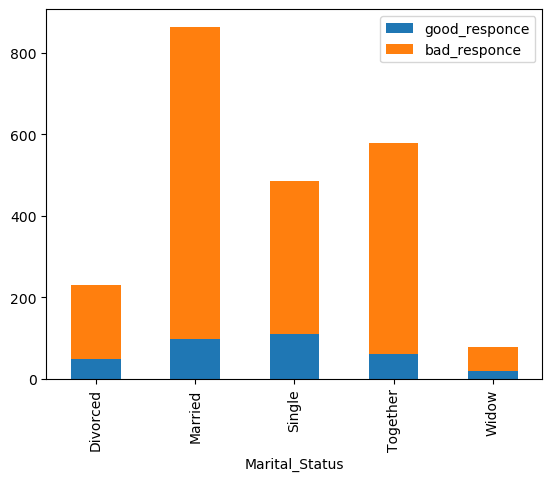

In [25]:
tmp_data.groupby('Marital_Status').agg('sum')[['good_responce', 'bad_responce']].plot(kind='bar',
                                                          stacked=True);

#### Numerical data

Let's check dependencies between categorical data and responce column

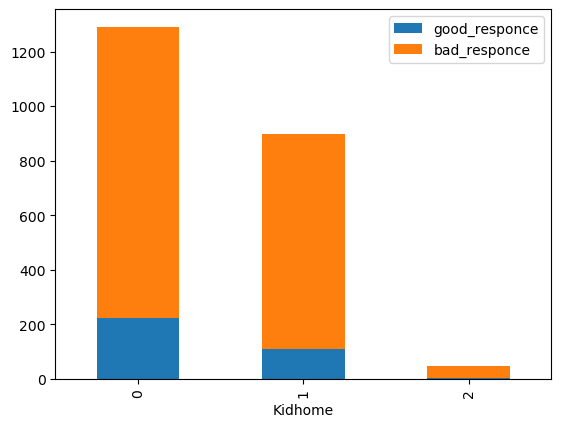

In [27]:
tmp_data.groupby('Kidhome').agg('sum')[['good_responce', 'bad_responce']].plot(kind='bar',
                                                          stacked=True);

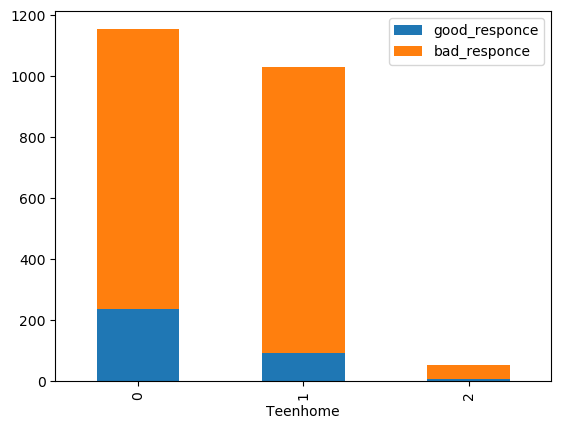

In [28]:
tmp_data.groupby('Teenhome').agg('sum')[['good_responce', 'bad_responce']].plot(kind='bar',
                                                          stacked=True);

### czy nie polaczyć kidhome i teenhome w jedno?

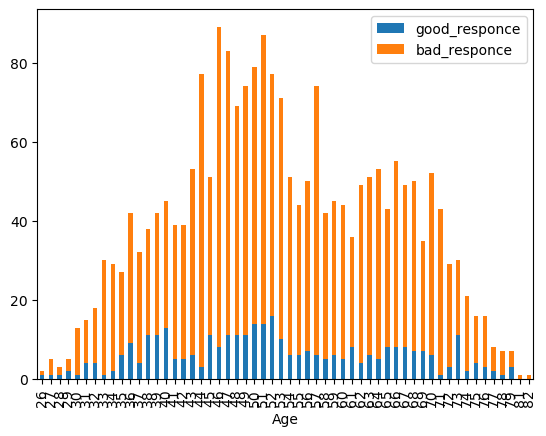

In [29]:
tmp_data.groupby('Age').agg('sum')[['good_responce', 'bad_responce']].plot(kind='bar',
                                                          stacked=True);